In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Flatten
import warnings
warnings.filterwarnings('ignore')


In [3]:
forest=pd.read_csv('forestfires .csv')
pd.set_option('display.max_columns',None)
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


### EDA:

In [4]:
forest.shape

(517, 31)

### Forest fire got 517 observations with 31 columns(including dummy columns)

In [5]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

#### No null entries present in dataset

In [7]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


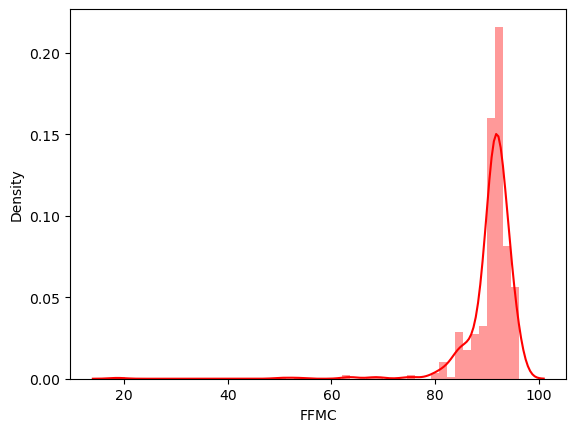

In [8]:
sns.distplot(forest['FFMC'],color='red')
plt.show()

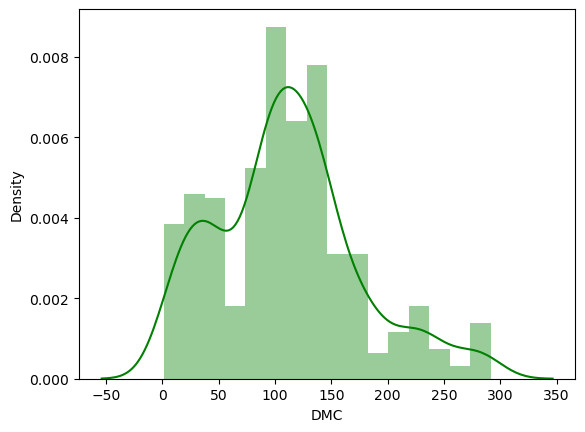

In [9]:
sns.distplot(forest['DMC'],color='green')
plt.show()

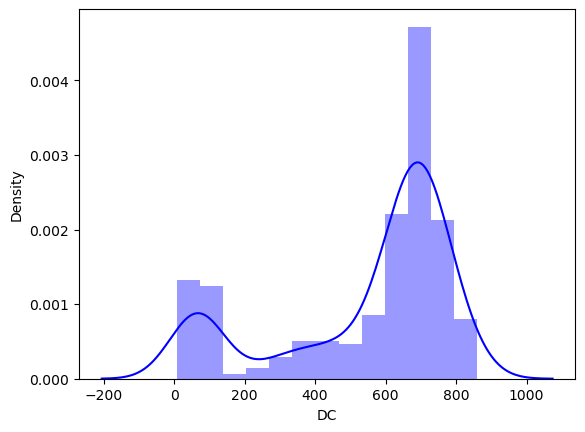

In [10]:
sns.distplot(forest['DC'],color='blue')
plt.show()

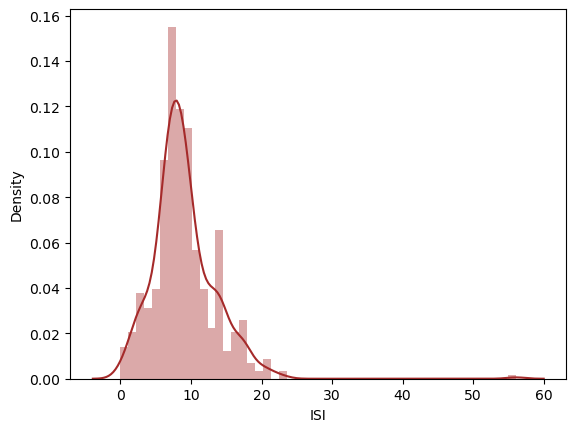

In [11]:
sns.distplot(forest['ISI'],color='brown')
plt.show()

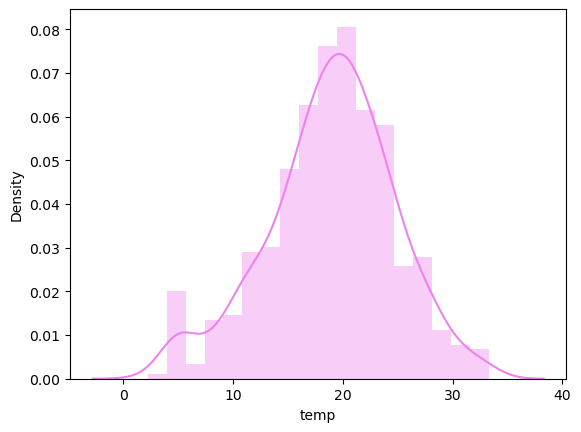

In [12]:
sns.distplot(forest['temp'],color='violet')
plt.show()

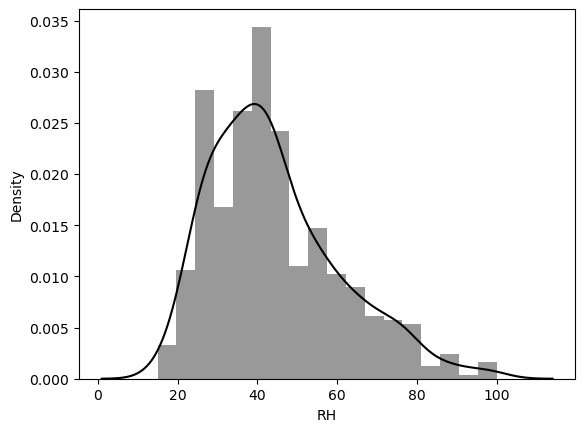

In [13]:
sns.distplot(forest['RH'],color='black')
plt.show()

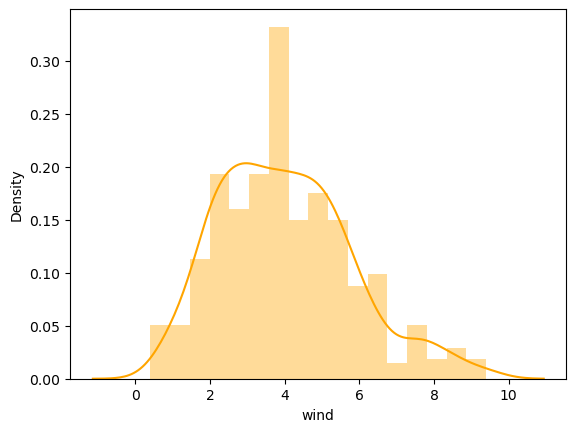

In [14]:
sns.distplot(forest['wind'],color='orange')
plt.show()

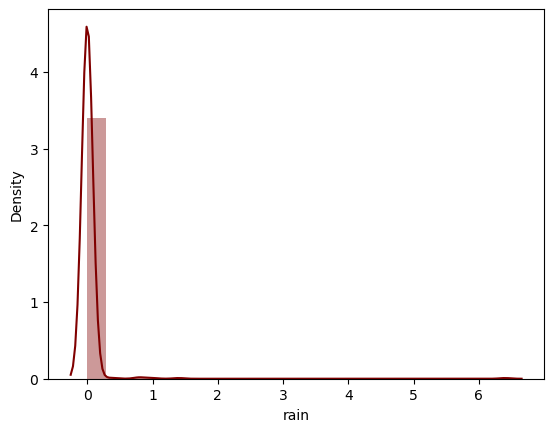

In [15]:
sns.distplot(forest['rain'],color='maroon')
plt.show()

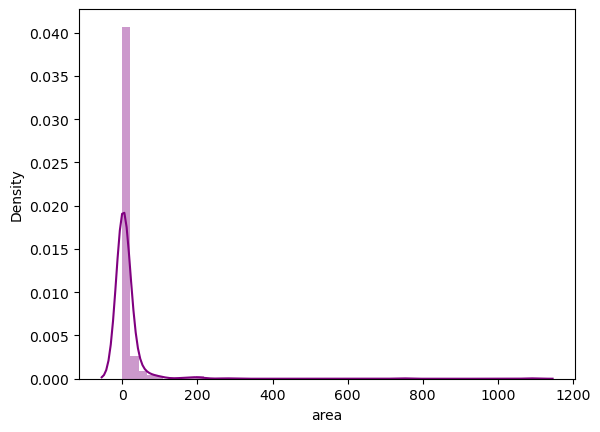

In [16]:
sns.distplot(forest['area'],color='purple')
plt.show()

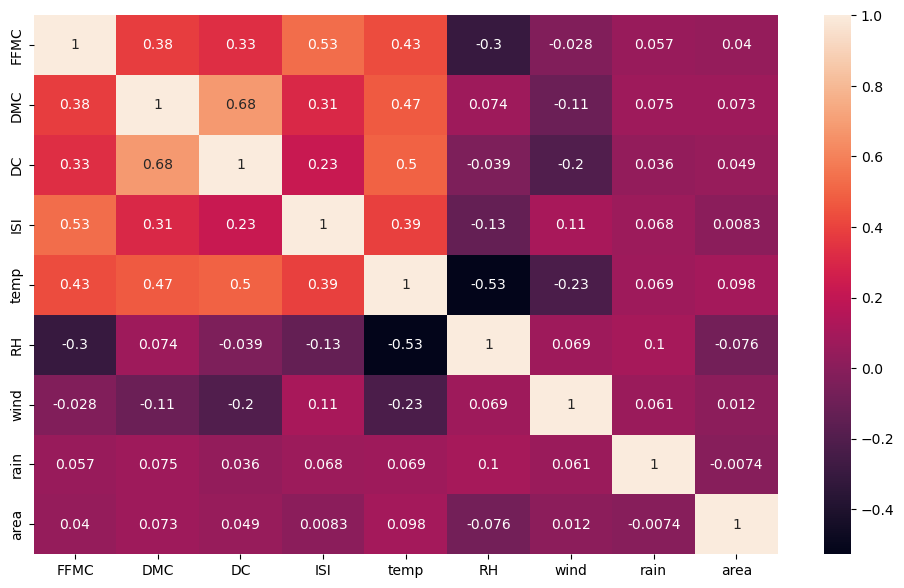

In [17]:
corr=forest[forest.columns[:11]].corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)
plt.show()

### DMC & DC are 68% positively correlated while RH & temp are 53 % negatively correlated

In [18]:
df=forest[forest.columns]
month_day_columns=df.select_dtypes(include='object').columns.tolist()

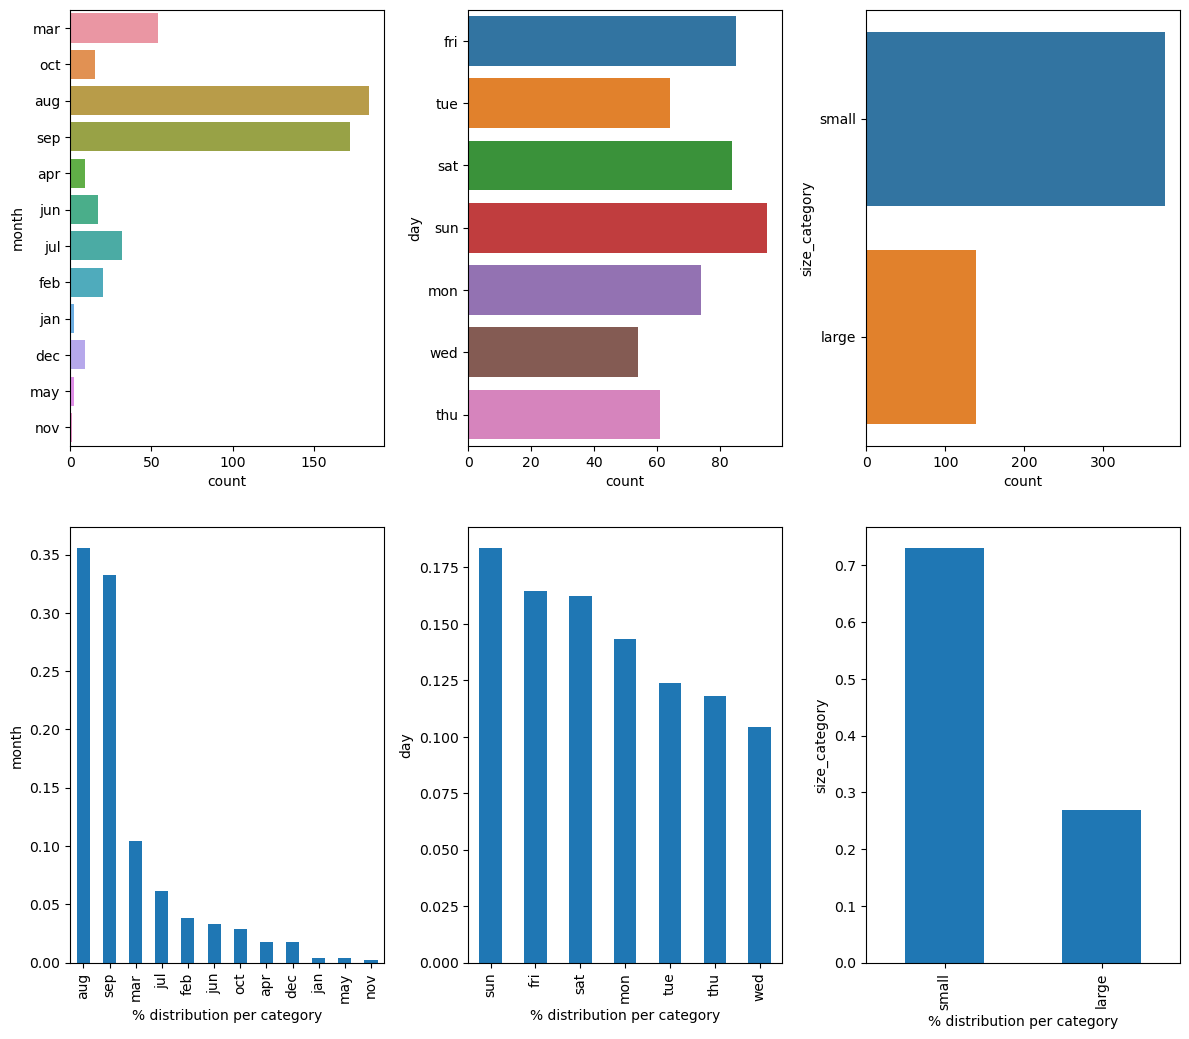

In [19]:
plt.figure(figsize=(12,15))
for i,col in enumerate(month_day_columns,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,y=col)
    plt.subplot(3,3,i+3)
    forest[col].value_counts(normalize=True).plot.bar()
    plt.xlabel('% distribution per category')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [20]:
df1=forest[forest.columns[2:11]]
num_columns=df1.select_dtypes(exclude='object').columns.tolist()

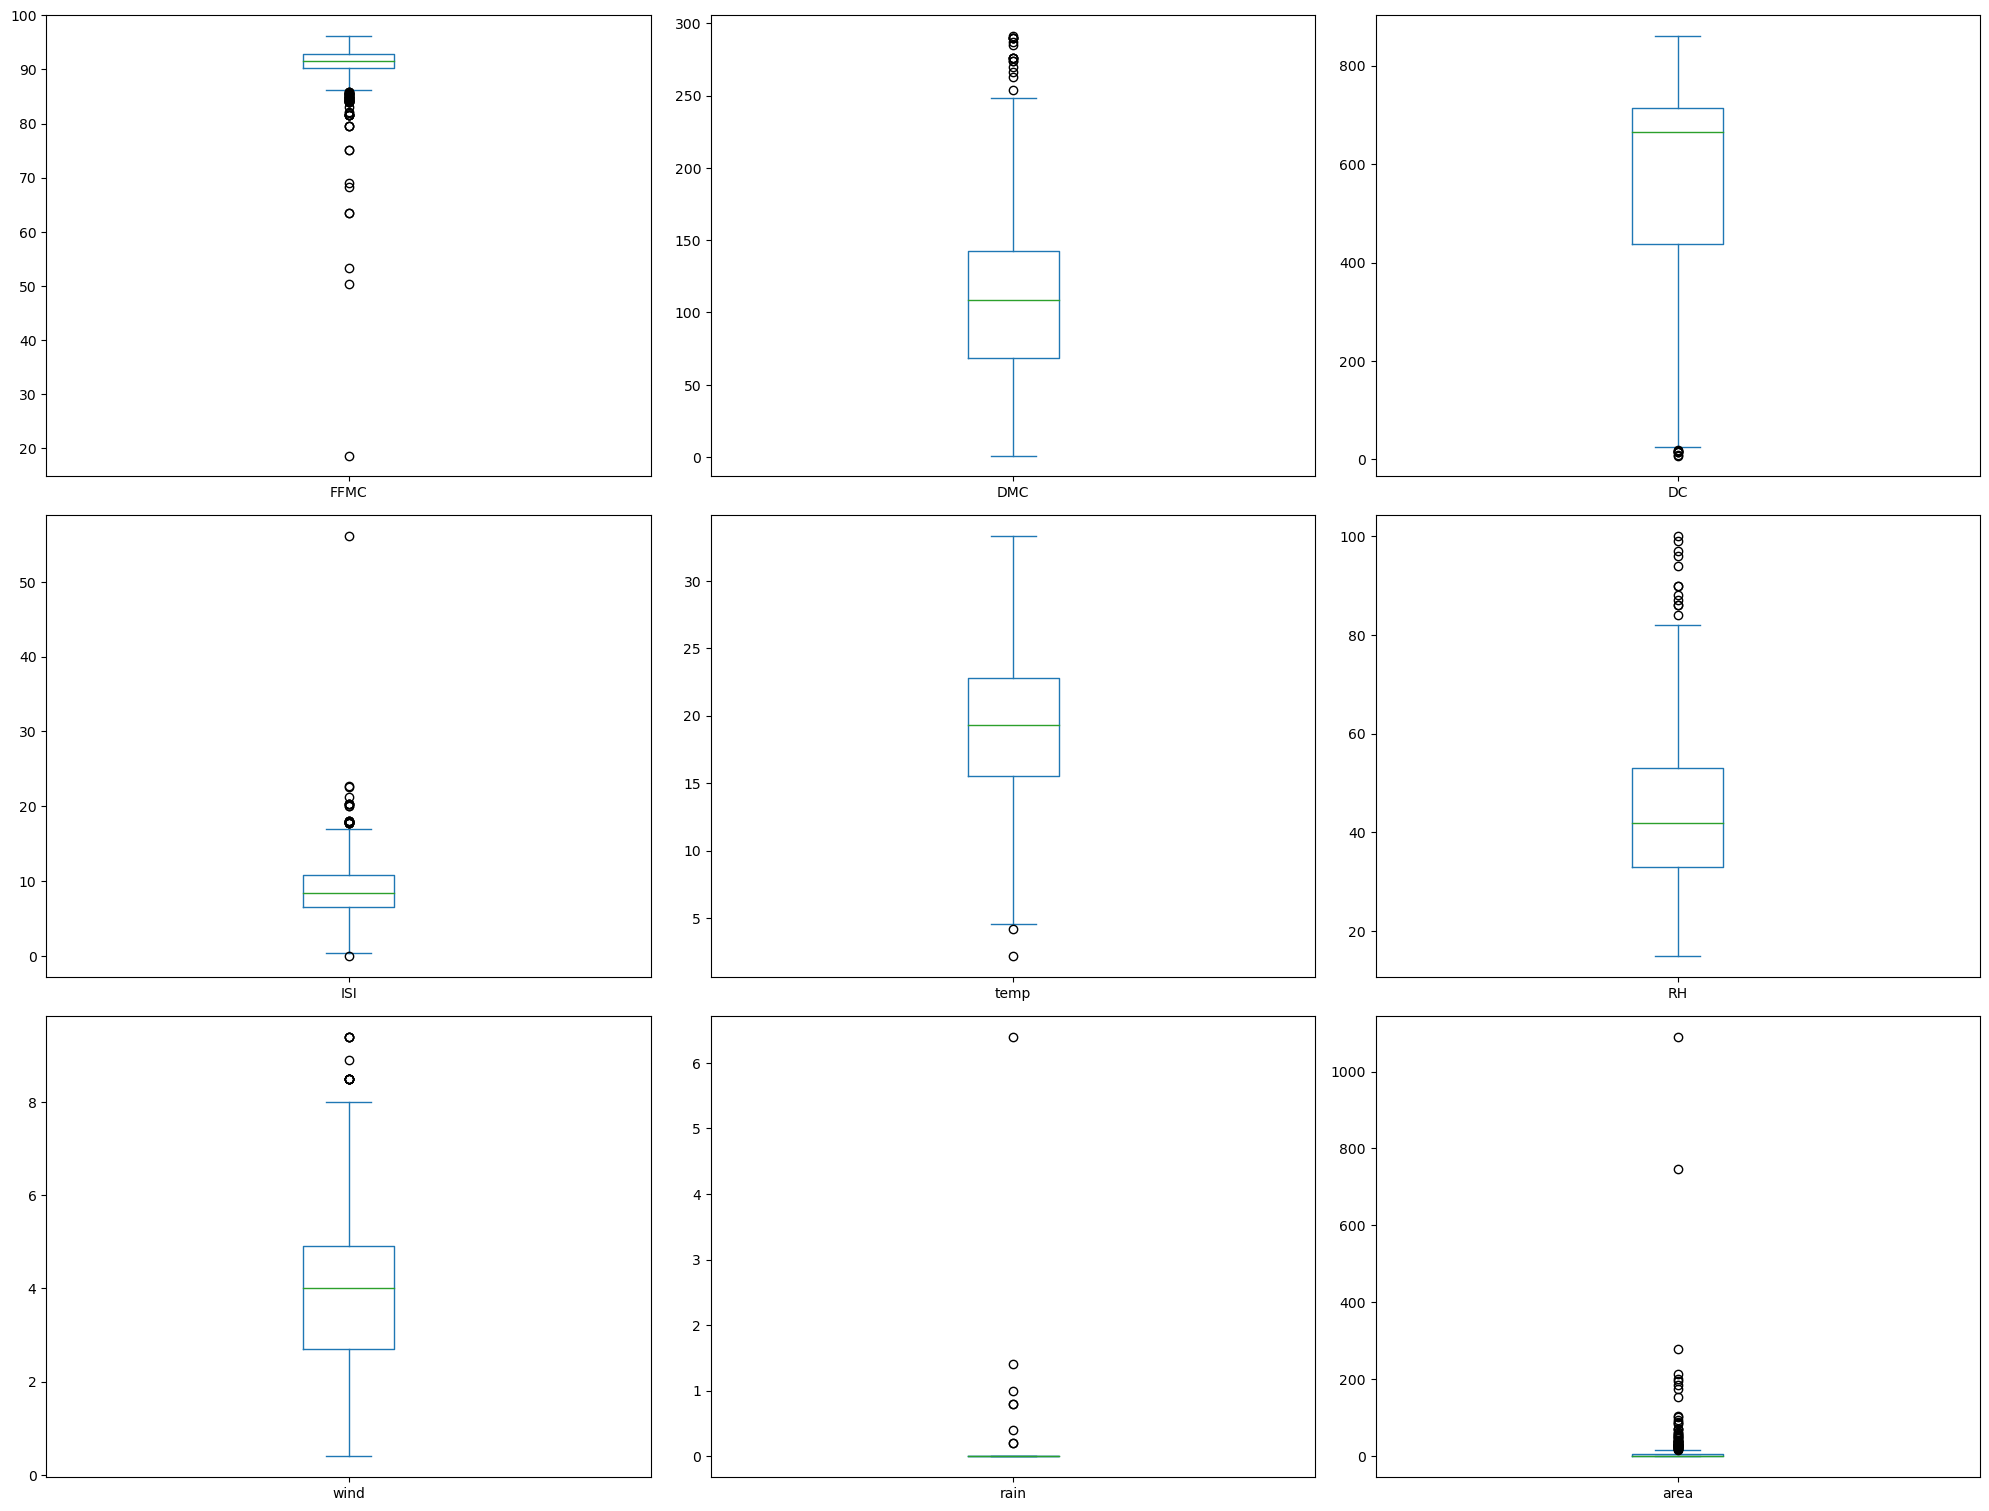

In [21]:
plt.figure(figsize=(20,45))
for i,col in enumerate(num_columns,1):
    plt.subplot(9,3,i)
    forest[col].plot.box()
plt.tight_layout()
plt.show()

In [22]:
#Lets DROP the orginal columns month and day having dummy columns
forest=forest.drop(['month','day'],axis=1)
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [23]:
#Convert String value of size category into numerical value
forest.loc[forest['size_category']=='small','size_category']=0
forest.loc[forest['size_category']=='large','size_category']=1

In [24]:
forest['size_category'].value_counts()

0    378
1    139
Name: size_category, dtype: int64

### Split data into input and output

In [25]:
x=forest.drop('size_category',axis=1)
y=forest[['size_category']]

In [26]:
y.dtypes

size_category    object
dtype: object

In [27]:
le=LabelEncoder()
y=le.fit_transform(y)

### Normalize the data

In [28]:
std=StandardScaler()
x_scaled=std.fit_transform(x)

### Model Architecture

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=12)

In [30]:
model=Sequential()
model.add(Dense(units=29,activation='relu'))
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

### Model Compilation

In [31]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='accuracy')

### Model Testing

In [32]:
forest_model=model.fit(x_train,y_train,epochs=100,batch_size=50,validation_split=0.15,validation_data=(x_test,y_test))

Epoch 1/100
9/9 [==============================] - 1s 24ms/step - loss: 0.6082 - accuracy: 0.7264 - val_loss: 0.6347 - val_accuracy: 0.6923
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5675 - accuracy: 0.7554 - val_loss: 0.6393 - val_accuracy: 0.6923
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5529 - accuracy: 0.7579 - val_loss: 0.6473 - val_accuracy: 0.6827
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5410 - accuracy: 0.7627 - val_loss: 0.6465 - val_accuracy: 0.6923
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5328 - accuracy: 0.7651 - val_loss: 0.6556 - val_accuracy: 0.6923
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5242 - accuracy: 0.7676 - val_loss: 0.6620 - val_accuracy: 0.6923
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5172 - accuracy: 0.7676 - val_loss: 0.6669 - val_accuracy: 0.6923
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 6ms/step - loss: 0.2049 - accuracy: 0.9274 - val_loss: 0.7312 - val_accuracy: 0.8462
Epoch 60/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1998 - accuracy: 0.9274 - val_loss: 0.7329 - val_accuracy: 0.8558
Epoch 61/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.9249 - val_loss: 0.7392 - val_accuracy: 0.8365
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1917 - accuracy: 0.9322 - val_loss: 0.7467 - val_accuracy: 0.8365
Epoch 63/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1872 - accuracy: 0.9370 - val_loss: 0.7596 - val_accuracy: 0.8462
Epoch 64/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1816 - accuracy: 0.9322 - val_loss: 0.7567 - val_accuracy: 0.8365
Epoch 65/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1785 - accuracy: 0.9395 - val_loss: 0.7682 - val_accuracy: 0.8558
Epoch 66/100
9/9 [===============

### Model Evaluation

In [33]:
model.evaluate(x_train,y_train)

13/13 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9903


[0.06209823861718178, 0.990314781665802]

In [34]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 1.0065 - accuracy: 0.8846


[1.0064631700515747, 0.8846153616905212]

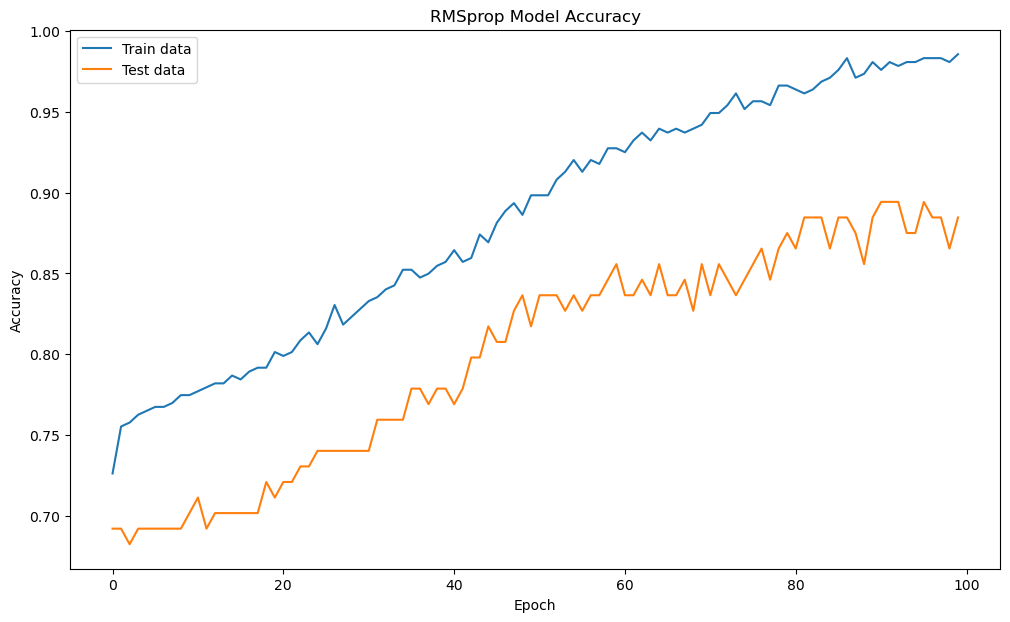

In [35]:
plt.figure(figsize=(12,7))
plt.plot(forest_model.history['accuracy'])
plt.plot(forest_model.history['val_accuracy'])
plt.title('RMSprop Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train data','Test data'],loc='upper left')
plt.show()

### Model compilation using ADAM optimizer

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

### Model Testing

In [37]:
new_model=model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_test,y_test))

Epoch 1/50
9/9 [==============================] - 1s 19ms/step - loss: 0.0700 - accuracy: 0.9806 - val_loss: 1.0143 - val_accuracy: 0.8654
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0629 - accuracy: 0.9903 - val_loss: 1.0131 - val_accuracy: 0.8846
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0578 - accuracy: 0.9879 - val_loss: 1.0307 - val_accuracy: 0.8942
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9879 - val_loss: 1.0474 - val_accuracy: 0.8942
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 0.9879 - val_loss: 1.0558 - val_accuracy: 0.8846
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9903 - val_loss: 1.0616 - val_accuracy: 0.8942
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0508 - accuracy: 0.9927 - val_loss: 1.0800 - val_accuracy: 0.8942
Epoch 8/50
9/9 [=================

### Model Evaluation

In [38]:
model.evaluate(x_train,y_train)

13/13 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 1.0000


[0.011702962219715118, 1.0]

In [39]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 1.5116 - accuracy: 0.9038


[1.511562466621399, 0.9038461446762085]

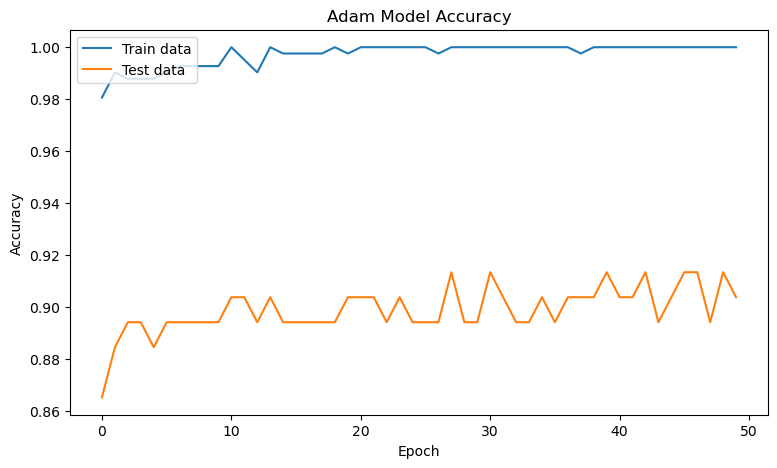

In [40]:
plt.figure(figsize=(9,5))
plt.plot(new_model.history['accuracy'])
plt.plot(new_model.history['val_accuracy'])
plt.title('Adam Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train data','Test data'],loc='upper left')
plt.show()

### Model 2's accuracy score is better and loss value is somewhat same for both models